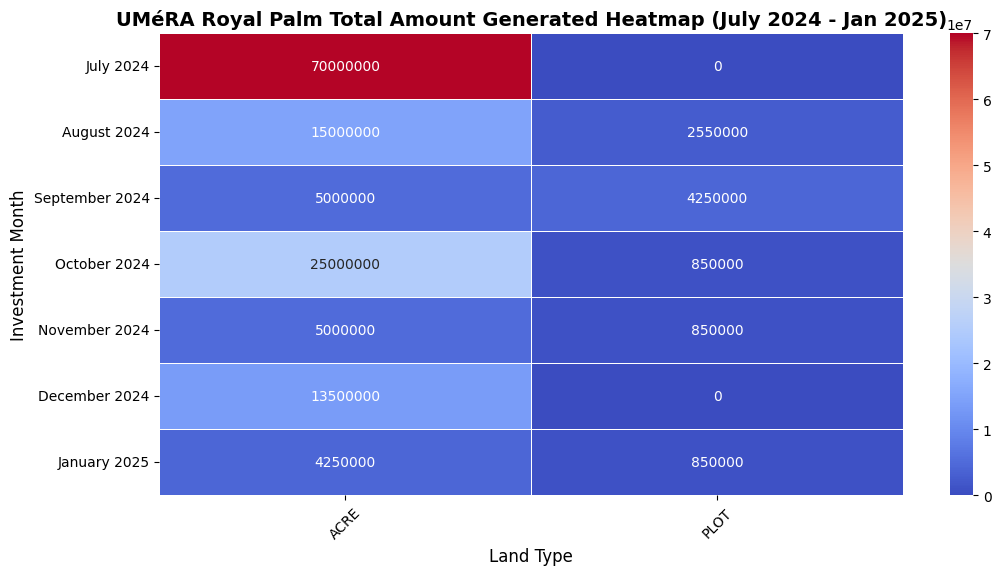

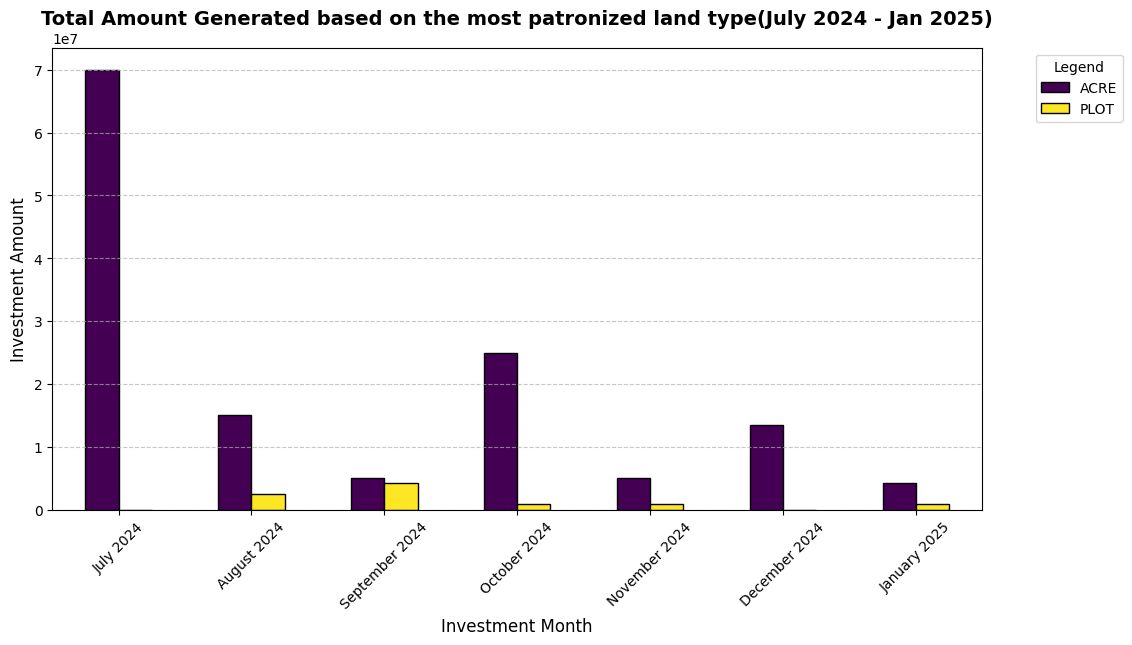

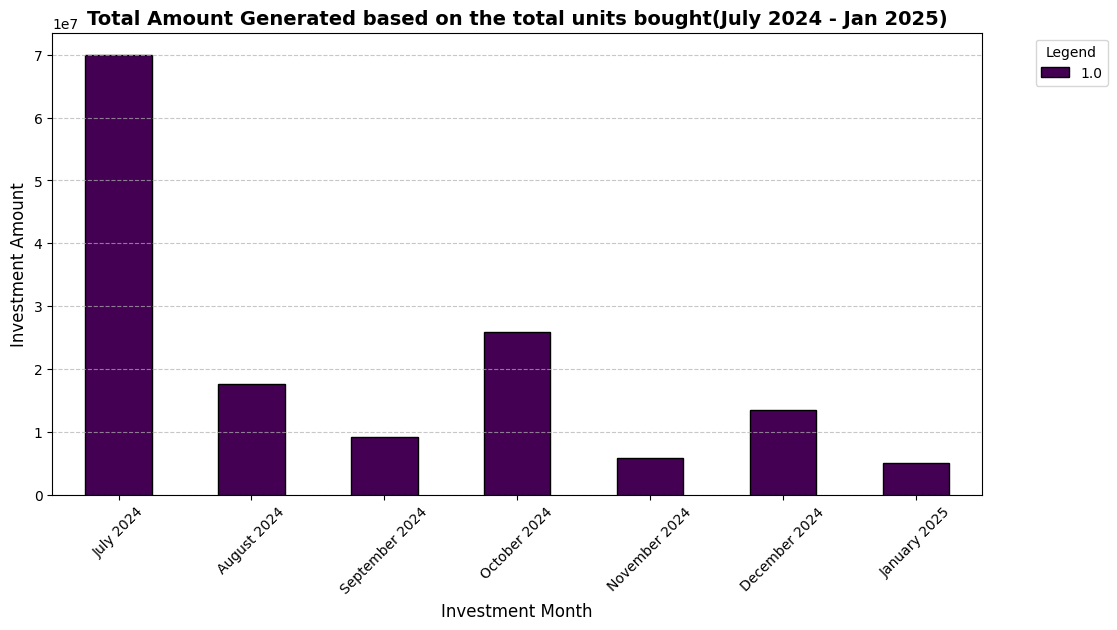

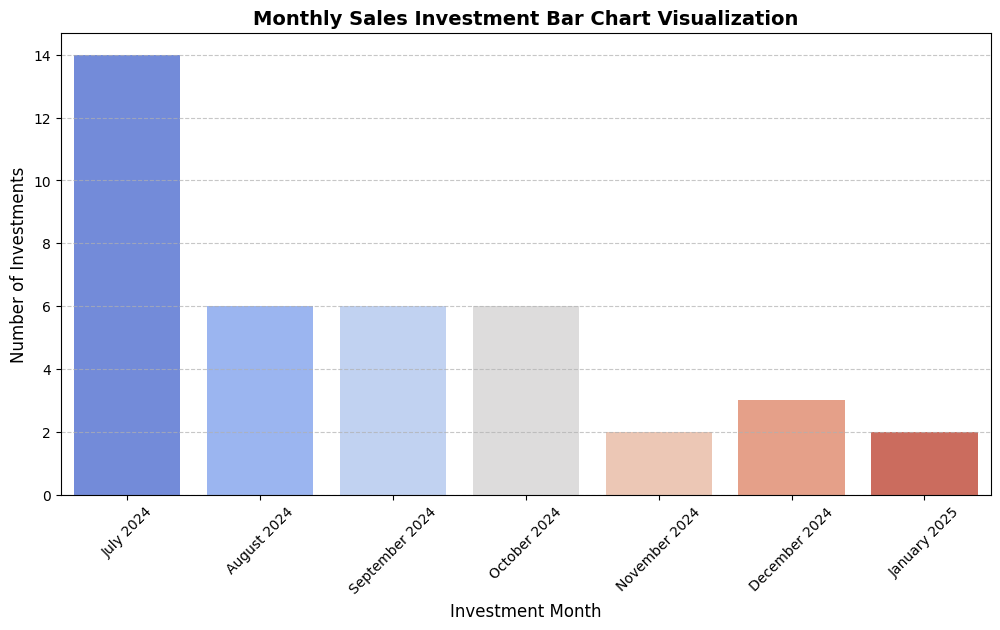

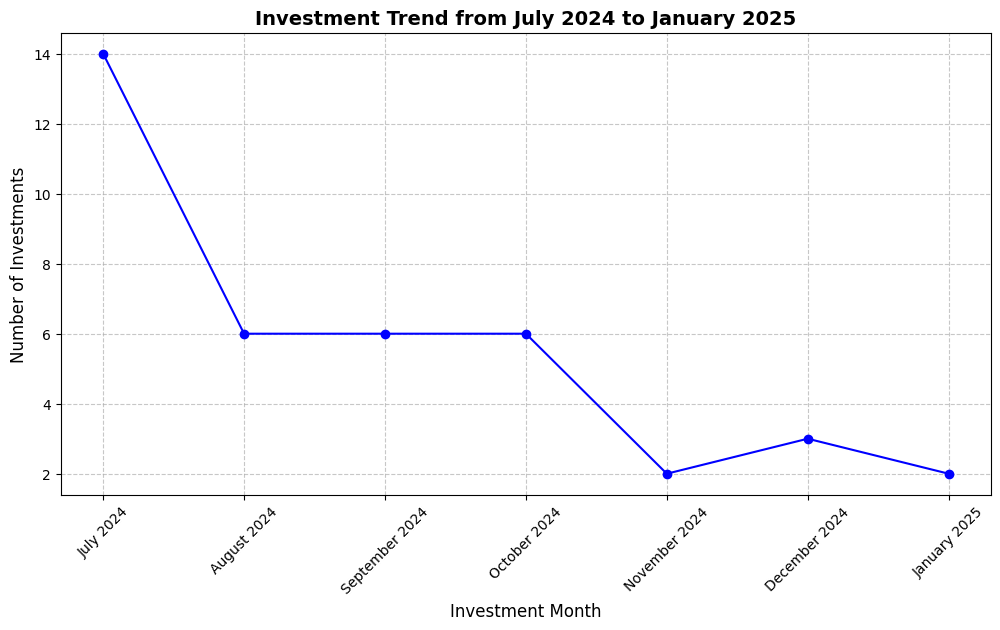

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Excel file
file_path = "ROYAL PALM RECEIPT & PORTFOLIO (2).xlsx"
xls = pd.ExcelFile(file_path)

# Load the 'PORTFOLIO' sheet
df_portfolio = pd.read_excel(xls, sheet_name="PORTFOLIO")

# Standardize column names
df_portfolio.columns = df_portfolio.columns.str.lower().str.replace(" ", "_")

# Convert investment_year to numeric
df_portfolio["investment_year"] = pd.to_numeric(df_portfolio["investment_year"], errors="coerce")

# Define target months and years
date_order = ["July 2024", "August 2024", "September 2024", "October 2024", "November 2024", "December 2024", "January 2025"]
month_mapping = {month.split()[0].upper(): month for month in date_order}

# Ensure 'investment_month' is a string and handle NaN values
df_portfolio["investment_month"] = df_portfolio["investment_month"].astype(str).str.upper()

# Create 'month_year' column
df_portfolio["month_year"] = df_portfolio.apply(
    lambda row: month_mapping.get(row["investment_month"], None) if row["investment_year"] in [2024, 2025] else None, 
    axis=1
)

# Filter dataset
filtered_df = df_portfolio[df_portfolio["month_year"].notna()].copy()

# Ensure the order of months
filtered_df.loc[:, "month_year"] = pd.Categorical(filtered_df["month_year"], categories=date_order, ordered=True)

# Convert "AMOUNT" to "AMOUNT INVESTED"
if "amount" in filtered_df.columns:
    filtered_df.rename(columns={"amount": "amount_invested"}, inplace=True)

# Convert "AMOUNT INVESTED" to numeric
filtered_df["amount_invested"] = pd.to_numeric(filtered_df["amount_invested"], errors="coerce")

# Group by Month & Land
land_group = filtered_df.groupby(["month_year", "land"])["amount_invested"].sum().unstack(fill_value=0)

# Group by Month & Unit
unit_group = filtered_df.groupby(["month_year", "unit"])["amount_invested"].sum().unstack(fill_value=0)


# Heatmap - Investment Distribution Over Time
def plot_heatmap(df):
    heatmap_data = df.pivot_table(values="amount_invested", index="month_year", columns="land", aggfunc="sum", fill_value=0)
    heatmap_data = heatmap_data.reindex(date_order)
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
    plt.title("UMéRA Royal Palm Total Amount Generated Heatmap (July 2024 - Jan 2025)", fontsize=14, fontweight="bold")
    plt.xlabel("Land Type", fontsize=12)
    plt.ylabel("Investment Month", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

# Function to plot bar chart
def plot_bar_chart(data, title, xlabel, ylabel):
    data.reindex(date_order).plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")
    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Function to plot pie chart
def plot_pie_chart(data, title):
    data.sum().plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8), colormap="Set3", startangle=140, wedgeprops={'edgecolor': 'black'})
    plt.title(title, fontsize=14, fontweight="bold")
    plt.ylabel("")
    plt.show()

# Function to plot monthly investment barplot
def plot_monthly_investment(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x="month_year", palette="coolwarm", order=date_order, hue="month_year", legend=False)
    plt.title("Monthly Sales Investment Bar Chart Visualization", fontsize=14, fontweight="bold")
    plt.xlabel("Investment Month", fontsize=12)
    plt.ylabel("Number of Investments", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Line Chart - Investment Trend Over Time
def plot_trend_line(df):
    trend_data = df.groupby("month_year").size().reindex(date_order, fill_value=0)
    plt.figure(figsize=(12, 6))
    plt.plot(trend_data.index, trend_data.values, marker="o", linestyle="-", color="b")
    plt.title("Investment Trend from July 2024 to January 2025", fontsize=14, fontweight="bold")
    plt.xlabel("Investment Month", fontsize=12)
    plt.ylabel("Number of Investments", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.xticks(rotation=45)
    plt.show()

# Plot all visualizations
plot_heatmap(filtered_df)
plot_bar_chart(land_group, "Total Amount Generated based on the most patronized land type(July 2024 - Jan 2025)", "Investment Month", "Investment Amount")
plot_bar_chart(unit_group, "Total Amount Generated based on the total units bought(July 2024 - Jan 2025)", "Investment Month", "Investment Amount")
plot_monthly_investment(filtered_df)
plot_trend_line(filtered_df)